## Visualizing the Probability that Population Mean Exceeds a Value
This notebook is my answer to Assignment 3 in the Applied Data Visualization course of the Applied Data Science certificate program on Coursera, offered by the University of Michigan. 

Researchers frequently fail to consider probability in early stages of data analysis. This assignment develops a tool described in the following paper:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))

The tool uses matplotlib to render a bar plot, with each bar derived from a row in the passed dataframe. The user can select a point on the graph, whose y-value will be used to make the following determination: What is the probability that the *population* mean of each group is *greater* than the given y-value. The probability for each bar will be indicated by a color, ranging from blue (low probability) to red (high probability).

In [603]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

In [606]:
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.stats as st

<IPython.core.display.Javascript object>


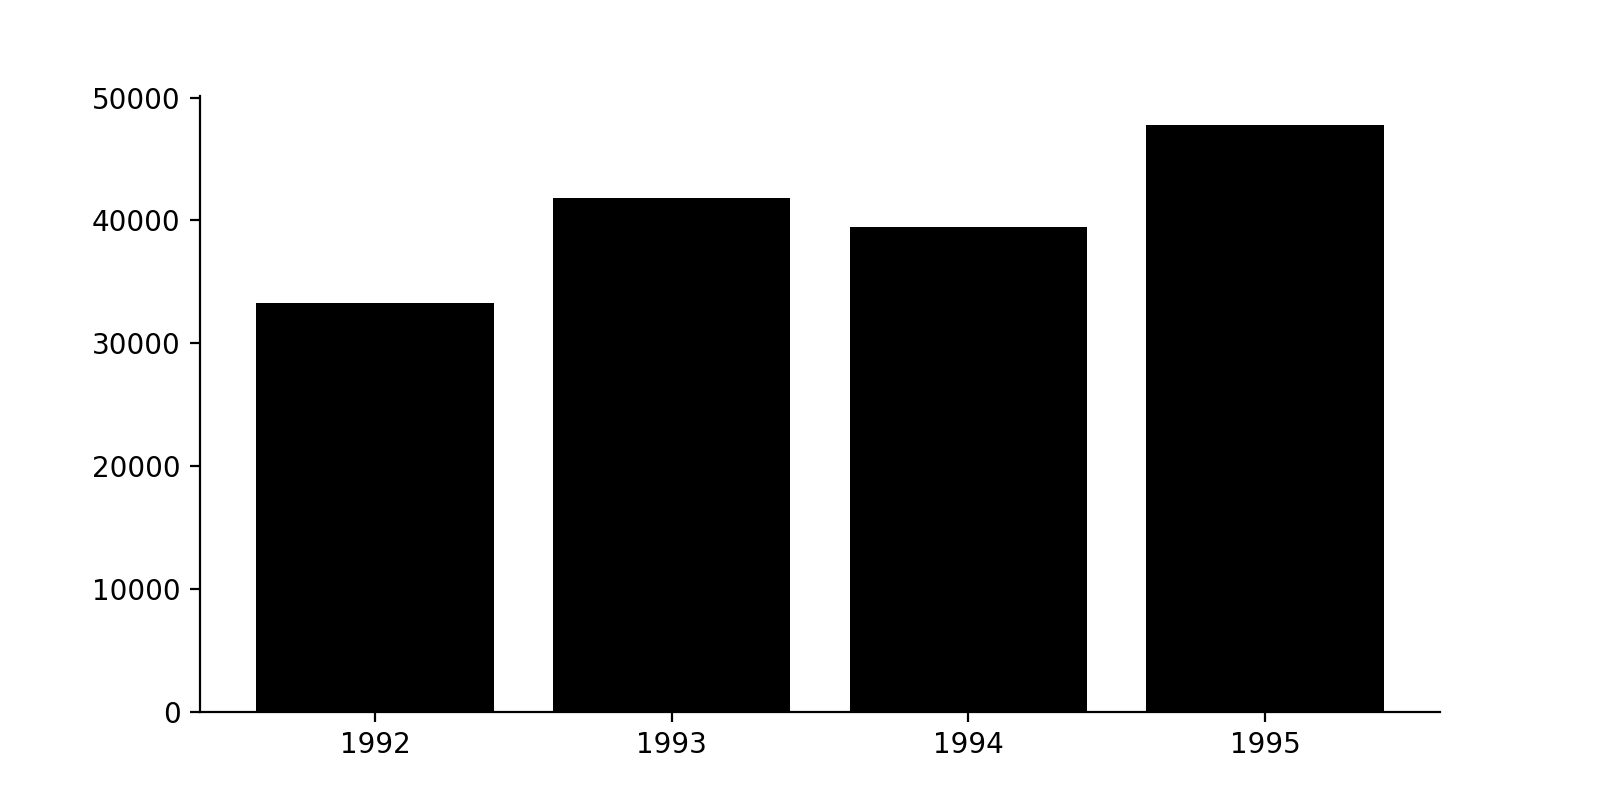

In [607]:
def create_probability_chart(df, rows=list(df.index)):
    plt.figure(figsize=(8,4))
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    for loc, key in enumerate(rows):
        mean = np.mean(df.loc[key])
        plt.bar(str(key), mean, color='black')
        ax.errorbar(x=str(key), y=st.sem(df.loc[key]))

create_probability_chart(df)